In [27]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn import metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score
from sklearn.metrics import recall_score, f1_score, roc_auc_score, roc_curve 

weather = pd.read_csv('weather.csv')

print(weather)

           date  cloud_cover  sunshine  global_radiation  max_temp  mean_temp  \
0      19790101          2.0       7.0              52.0       2.3       -4.1   
1      19790102          6.0       1.7              27.0       1.6       -2.6   
2      19790103          5.0       0.0              13.0       1.3       -2.8   
3      19790104          8.0       0.0              13.0      -0.3       -2.6   
4      19790105          6.0       2.0              29.0       5.6       -0.8   
...         ...          ...       ...               ...       ...        ...   
15336  20201227          1.0       0.9              32.0       7.5        7.5   
15337  20201228          7.0       3.7              38.0       3.6        1.1   
15338  20201229          7.0       0.0              21.0       4.1        2.6   
15339  20201230          6.0       0.4              22.0       5.6        2.7   
15340  20201231          7.0       1.3              34.0       1.5       -0.8   

       min_temp  precipitat

In [28]:
new_weather = weather.dropna()
print(new_weather)

           date  cloud_cover  sunshine  global_radiation  max_temp  mean_temp  \
0      19790101          2.0       7.0              52.0       2.3       -4.1   
1      19790102          6.0       1.7              27.0       1.6       -2.6   
2      19790103          5.0       0.0              13.0       1.3       -2.8   
3      19790104          8.0       0.0              13.0      -0.3       -2.6   
4      19790105          6.0       2.0              29.0       5.6       -0.8   
...         ...          ...       ...               ...       ...        ...   
14970  20191227          8.0       0.0              12.0       9.6        7.5   
14971  20191228          8.0       0.0              12.0       9.9        8.1   
14972  20191229          6.0       2.2              29.0      11.5        8.7   
14973  20191230          0.0       3.6              37.0       9.3        6.5   
14974  20191231          7.0       0.0              13.0       9.4        7.1   

       min_temp  precipitat

In [29]:
new_weather.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13843 entries, 0 to 14974
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   date              13843 non-null  int64  
 1   cloud_cover       13843 non-null  float64
 2   sunshine          13843 non-null  float64
 3   global_radiation  13843 non-null  float64
 4   max_temp          13843 non-null  float64
 5   mean_temp         13843 non-null  float64
 6   min_temp          13843 non-null  float64
 7   precipitation     13843 non-null  float64
 8   pressure          13843 non-null  float64
 9   snow_depth        13843 non-null  float64
dtypes: float64(9), int64(1)
memory usage: 1.2 MB


In [30]:
new_weather['date'] = pd.to_datetime(new_weather['date'], format = '%Y%m%d')
new_weather['month'] = new_weather['date'].dt.strftime('%B')
new_weather = pd.get_dummies(new_weather)
new_weather.head()

C:\Users\Public\Documents\Wondershare\CreatorTemp/ipykernel_2548/3727186631.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_weather['date'] = pd.to_datetime(new_weather['date'], format = '%Y%m%d')
C:\Users\Public\Documents\Wondershare\CreatorTemp/ipykernel_2548/3727186631.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_weather['month'] = new_weather['date'].dt.strftime('%B')


,date,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth,...,month_December,month_February,month_January,month_July,month_June,month_March,month_May,month_November,month_October,month_September
0,1979-01-01,2.0,7.0,52.0,2.3,-4.1,-7.5,0.4,101900.0,9.0,...,0,0,1,0,0,0,0,0,0,0
1,1979-01-02,6.0,1.7,27.0,1.6,-2.6,-7.5,0.0,102530.0,8.0,...,0,0,1,0,0,0,0,0,0,0
2,1979-01-03,5.0,0.0,13.0,1.3,-2.8,-7.2,0.0,102050.0,4.0,...,0,0,1,0,0,0,0,0,0,0
3,1979-01-04,8.0,0.0,13.0,-0.3,-2.6,-6.5,0.0,100840.0,2.0,...,0,0,1,0,0,0,0,0,0,0
4,1979-01-05,6.0,2.0,29.0,5.6,-0.8,-1.4,0.0,102250.0,1.0,...,0,0,1,0,0,0,0,0,0,0


In [31]:
new_weather.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13843 entries, 0 to 14974
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   date              13843 non-null  datetime64[ns]
 1   cloud_cover       13843 non-null  float64       
 2   sunshine          13843 non-null  float64       
 3   global_radiation  13843 non-null  float64       
 4   max_temp          13843 non-null  float64       
 5   mean_temp         13843 non-null  float64       
 6   min_temp          13843 non-null  float64       
 7   precipitation     13843 non-null  float64       
 8   pressure          13843 non-null  float64       
 9   snow_depth        13843 non-null  float64       
 10  month_April       13843 non-null  uint8         
 11  month_August      13843 non-null  uint8         
 12  month_December    13843 non-null  uint8         
 13  month_February    13843 non-null  uint8         
 14  month_January     1384

In [32]:
new_weather['mean_temp'].agg(['min', 'max'])

min    -7.6
max    29.0
Name: mean_temp, dtype: float64

In [33]:
new_weather.loc[new_weather['mean_temp'] > 10.7, 'mean_temp_category'] = 'High'
new_weather.loc[new_weather['mean_temp'] <= 10.7, 'mean_temp_category'] = 'Low'

In [34]:
X = new_weather[['global_radiation', 'precipitation', 'pressure', 'snow_depth', 'month_January', 'month_February', 'month_March', 'month_April', 'month_May', 'month_June', 'month_July', 'month_August', 'month_September', 'month_October', 'month_November', 'month_December']]
y = new_weather['mean_temp_category']

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [36]:
lr = LogisticRegression(solver = 'liblinear')
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

0.879378837125316

In [37]:
binary_model = LogisticRegression(max_iter=1000)
binary_model.fit(X_train, y_train)
binary_predictions = binary_model.predict(X_test)
binary_accuracy = accuracy_score(y_test, binary_predictions)
binary_classification_report = classification_report(y_test, binary_predictions)
print("Binary Classification Report:\n", binary_classification_report)
print("Binary Accuracy:", binary_accuracy)

Binary Classification Report:
               precision    recall  f1-score   support

        High       0.79      0.71      0.75      1402
         Low       0.73      0.81      0.77      1367

    accuracy                           0.76      2769
   macro avg       0.76      0.76      0.76      2769
weighted avg       0.76      0.76      0.76      2769

Binary Accuracy: 0.758757674250632


In [38]:
#Multiclass Classification:

In [39]:
#explore dataset
new_weather.head()

,date,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth,...,month_February,month_January,month_July,month_June,month_March,month_May,month_November,month_October,month_September,mean_temp_category
0,1979-01-01,2.0,7.0,52.0,2.3,-4.1,-7.5,0.4,101900.0,9.0,...,0,1,0,0,0,0,0,0,0,Low
1,1979-01-02,6.0,1.7,27.0,1.6,-2.6,-7.5,0.0,102530.0,8.0,...,0,1,0,0,0,0,0,0,0,Low
2,1979-01-03,5.0,0.0,13.0,1.3,-2.8,-7.2,0.0,102050.0,4.0,...,0,1,0,0,0,0,0,0,0,Low
3,1979-01-04,8.0,0.0,13.0,-0.3,-2.6,-6.5,0.0,100840.0,2.0,...,0,1,0,0,0,0,0,0,0,Low
4,1979-01-05,6.0,2.0,29.0,5.6,-0.8,-1.4,0.0,102250.0,1.0,...,0,1,0,0,0,0,0,0,0,Low


In [40]:
new_weather.columns

Index(['date', 'cloud_cover', 'sunshine', 'global_radiation', 'max_temp',
       'mean_temp', 'min_temp', 'precipitation', 'pressure', 'snow_depth',
       'month_April', 'month_August', 'month_December', 'month_February',
       'month_January', 'month_July', 'month_June', 'month_March', 'month_May',
       'month_November', 'month_October', 'month_September',
       'mean_temp_category'],
      dtype='object')

In [41]:
new_weather.describe().T

,count,mean,std,min,25%,50%,75%,max
cloud_cover,13843.0,5.328180,2.034170,0.0,4.0,6.0,7.00,9.0
sunshine,13843.0,4.262609,3.987488,0.0,0.4,3.4,7.10,15.7
global_radiation,13843.0,114.529148,87.758136,12.0,39.0,89.0,180.00,352.0
max_temp,13843.0,14.951911,6.510220,-6.2,10.2,14.4,19.70,37.9
mean_temp,13843.0,11.085408,5.700936,-7.6,6.8,10.8,15.55,29.0
min_temp,13843.0,7.212302,5.319409,-11.8,3.2,7.3,11.40,22.3
precipitation,13843.0,1.667493,3.733947,0.0,0.0,0.0,1.60,61.8
pressure,13843.0,101538.493101,1066.084413,95960.0,100900.0,101630.0,102260.00,104430.0
snow_depth,13843.0,0.037853,0.545712,0.0,0.0,0.0,0.00,22.0
month_April,13843.0,0.085242,0.279251,0.0,0.0,0.0,0.00,1.0


<function matplotlib.pyplot.show(close=None, block=None)>

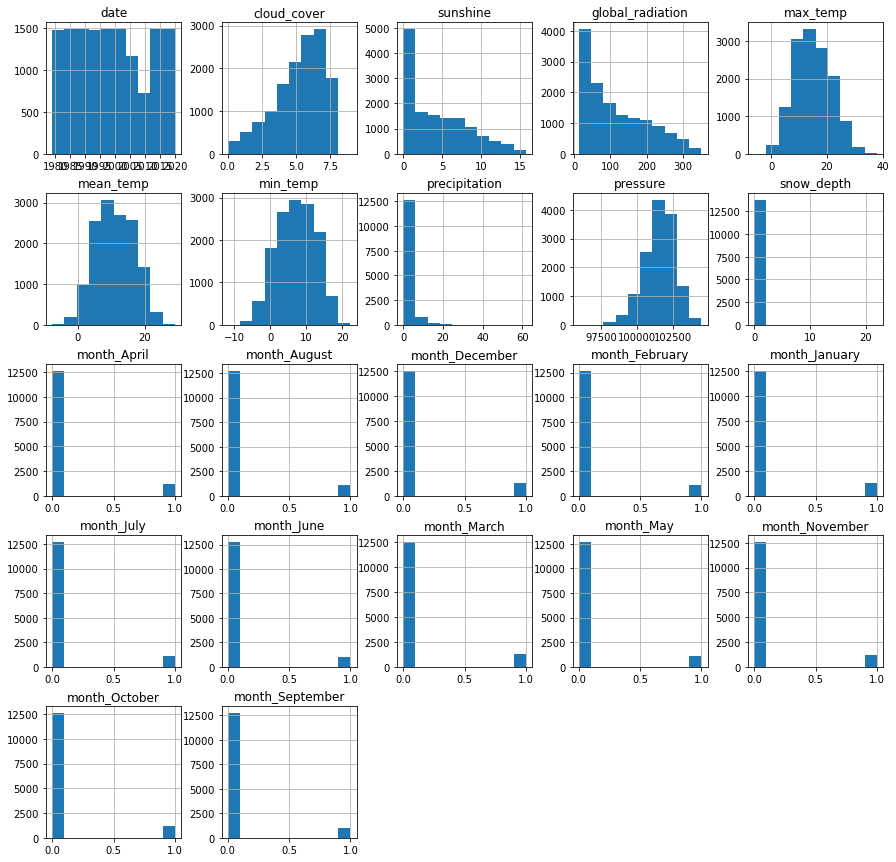

In [42]:
#distribution of data using histogram
new_weather.hist(figsize=(15,15)) 
plt.show

In [43]:
new_weather.loc[new_weather['mean_temp'] >= 16.8, 'mean_temp_cat_multi'] = 'High'
new_weather.loc[(new_weather['mean_temp'] >= 4.6) & (new_weather['mean_temp'] < 16.8), 
                'mean_temp_cat_multi'] = 'Moderate'
new_weather.loc[new_weather['mean_temp'] < 4.6, 'mean_temp_cat_multi'] = 'Low'

In [44]:
new_weather['mean_temp_cat_multi'].unique()

array(['Low', 'Moderate', 'High'], dtype=object)

In [45]:
#generate 2 classes
X = new_weather[['cloud_cover','sunshine','global_radiation', 'snow_depth','month_January', 
                 'month_February', 'month_March', 'month_April', 'month_May', 'month_June', 
                 'month_July', 'month_August', 'month_September', 'month_October', 'month_November', 
                 'month_December']]
y = new_weather['mean_temp_cat_multi']

In [46]:
#test and train for data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [47]:
#fit the model
lr=LogisticRegression(solver="lbfgs", multi_class='multinomial', max_iter=10000).fit(X_train, y_train)

In [48]:
#prediction
predictions = lr.predict(X_test)
print('Predicted labels: ', predictions[:15])
print('Actual labels: ', y_test[:15])

Predicted labels:  ['High' 'Moderate' 'Moderate' 'Moderate' 'Moderate' 'Moderate' 'High'
 'High' 'Moderate' 'Moderate' 'Moderate' 'High' 'Moderate' 'Moderate'
 'Moderate']
Actual labels:  14093        High
12710    Moderate
4143         High
4801     Moderate
1611         High
4019     Moderate
1696         High
4989     Moderate
4154     Moderate
8037     Moderate
3197     Moderate
7516         High
1229     Moderate
5560     Moderate
13409    Moderate
Name: mean_temp_cat_multi, dtype: object


array([[ 351,    0,  152],
       [   0,   87,  282],
       [ 143,   48, 1706]], dtype=int64)

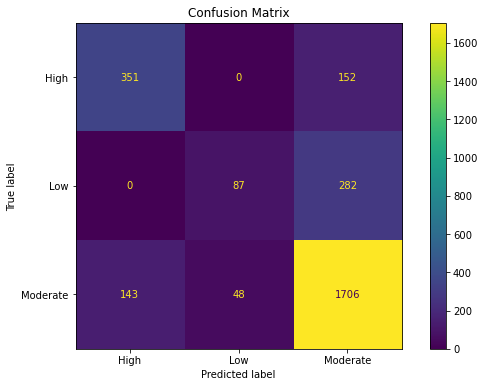

In [49]:
#confusion matrix
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title('Confusion Matrix')

display = metrics.plot_confusion_matrix(lr, X_test, y_test, ax = ax)
display.confusion_matrix

In [50]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

        High       0.71      0.70      0.70       503
         Low       0.64      0.24      0.35       369
    Moderate       0.80      0.90      0.85      1897

    accuracy                           0.77      2769
   macro avg       0.72      0.61      0.63      2769
weighted avg       0.76      0.77      0.75      2769



In [51]:
#data scoring
print("Overall Accuracy or Error Rate:",accuracy_score(y_test, predictions))
print("Overall Precision:",precision_score(y_test, predictions, average='macro'))
print("Overall Recall:",recall_score(y_test, predictions, average='macro'))
print("Overall F1 Score",f1_score(y_test, predictions, average="macro"))

Overall Accuracy or Error Rate: 0.7742867461177321
Overall Precision: 0.7173890073053871
Overall Recall: 0.6109667288095771
Overall F1 Score 0.6315108327132138
